In [2]:
import pandas as pd
# For Geovisualization
import plotly.express as px

# WHERE WE LEFT OFF
In the last article: The Battle of Interactive Geographic Visualization Part 1 - Interactive Geoplot Using One Line of Code, we discussed the importance of producing geoplots/geovisualization for data exploration as it may reveal interesting insights and patterns of the data that may elevate your data science projects to a whole new level.
In addition, we produced a geo-scatter plot of our dataset using the interactive Python package, Holoviews and as a bonus, we deployed it as a web page for presentation purposes.
In this article, we'll use the same dataset to produce a similar interactive geo-plot, but with the Plotly Express package.

# PLOTLY EXPRESS
Before we get on to Plotly express, it is worth discussing how Plotly is one of the leading and most popular interactive plotting libraries for Python, R, and other programming languages.
Plotly Express is a high-level wrapper for the Plotly library, which means that it calls on the functionalities of the Plotly library, but with simpler and easier syntax.
And with that introduction, let's produce our plot with just one line of code.

## LOAD THE DATASET

Let us load the same dataset and try to create an interactive graph but this now through Plotly Express.

In [3]:
df = pd.read_csv('data/Coffee Brands Footprint.csv',
                index_col=0)
df.head()

,id,brand,name,lat,lng,vicinity
1,ChIJ8aEd9AfyljMRtVgVdqt50kQ,Coffee Bean and Tea Leaf,The Coffee Bean and Tea Leaf,15.164039,120.609505,"Aniceto Gueco St, Angeles"
2,ChIJr_LhvYDtljMRoHrJ5BjoZJE,Coffee Bean and Tea Leaf,The Coffee Bean & Tea Leaf,15.168922,120.580243,"G/F SM City Clark, Manuel A. Roxas Hwy, Clark ..."
3,ChIJc0t13u3tljMRLbLEQRp3vZs,Coffee Bean and Tea Leaf,The Coffee Bean & Tea Leaf,15.169827,120.578192,"Tech Hub, SM Clark, Clark Freeport, Angeles"
4,ChIJ2dePHIjzljMRN2gsqVkO6S4,Coffee Bean and Tea Leaf,The Coffee Bean and Tea Leaf,15.167694,120.564239,"Clark Freeport, Mabalacat"
5,ChIJy19IElXtljMRnnAcNA-x2iA,Starbucks,Starbucks,15.177889,120.530057,"Manuel A. Roxas Hwy, Clark Freeport, Mabalacat"


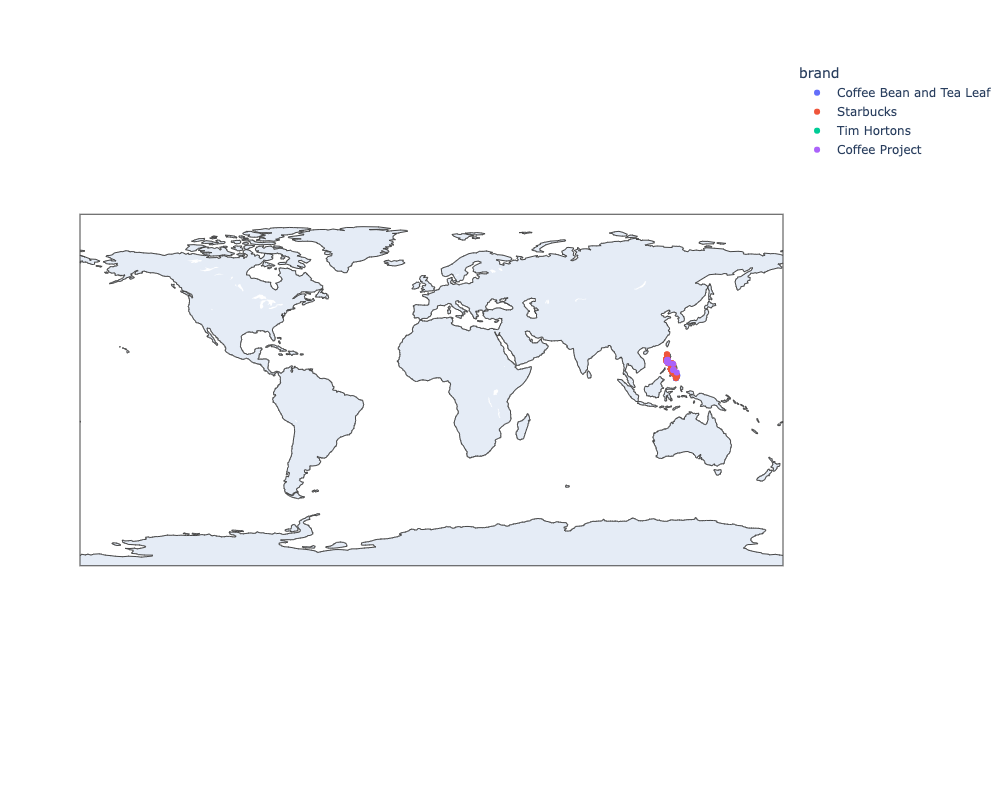

In [29]:
px.scatter_geo(df,
               lat = df['lat'],
               lon = df['lng'],
               color = df['brand'],
               hover_name = df["name"],
                     width=1600,
                    height=800,
                    )
# fig.show() #The graph is now saved in the fig object. This can be called in other places by using the ".show()" command.

As we can see, we have already produced an interactive geoplot but we can customize it and improve it further.
The improvements we will make are the following:
1. Center the plot on the Philippines.
2. Make the focus of the frame to be just on Asia.
3. Changed the opacity or transparency of the scatter points.

To accomplish, these three (3) things, is easy: we just supply the parameter for the arguments corresponding to these desired changes, but first, this super useful tip:

### TIP: Get the longitude and latitude automatically of a country or city

In [10]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geocoder") #Do not forget to put in the user_agent argument
location = geolocator.geocode("Philippines")
print((location.latitude, location.longitude))

(12.7503486, 122.7312101)


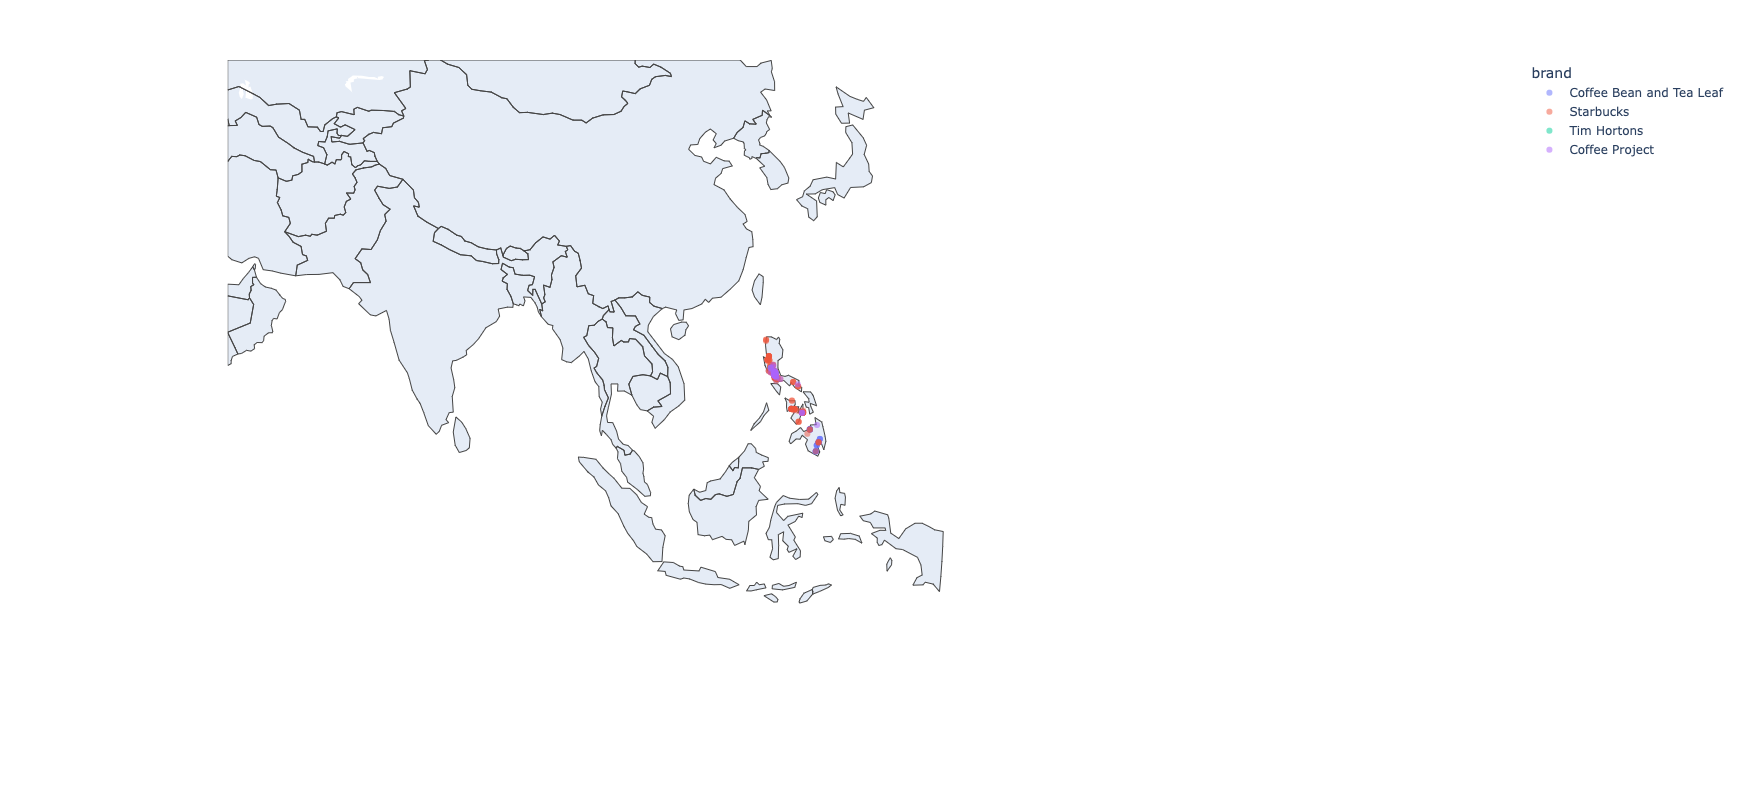

In [31]:
fig = px.scatter_geo(df,
               lat = df['lat'],
               lon = df['lng'],
               color = df['brand'],
               hover_name = df["name"],
                     scope='asia',
                     projection='natural earth',
                     width=1600,
                    height=800,
                center={
                    'lat': location.latitude,
                    'lon': location.longitude
                },
                     opacity=0.5
                    )
fig.show() #The graph is now saved in the fig object. This can be called in other places by using the ".show()" command.

# ADVANTAGES AND DISADVANTAGES
Being easy to use, while in itself, is a great advantage, comes with disadvantages as well, compared to other libraries.
The other advantage of the plotly express compared to other libraries is that it can support animations (which is a different article) and would be a happy addition to our already impressive visualization.
The disadvantage, however, is that there are limited customizations compared to other libraries such as folium and even Holoviews where deployment is easier.

# CONCLUDING REMARKS
For beginners who would like to develop some understanding of what is and how to do interactive geographic visualization , plotly express provides the perfect training ground and library to learn from.

As our needs become more elaborate, however, we may need to perform more computations and use more low-level library to accomplish these but we will discuss these in our succeeding articles.